## Data Analysis Mathematics, Algorithms and Modeling

# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

The relationship between a recipe number of ingredients (n_ingredients) and steps (n_steps) is examined in this analysis. We evaluate if recipes with additional ingredients need more steps using linear regression. In order to determine how well the data fits the model, the study focuses on assessing the model's reliability using Homoscedasticity and R-squared measurements.

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [9]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


##### RawRecipe : Dataset in classes and methods

In [10]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [11]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [12]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recipe Id

In [13]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


#### The differences between Simple, Linear, Non-Linear, and Logistic Regressions.

| Type                  |   Definition                      | 	Key Features                                          | 	
|-----------------------|-----------------------------------|---------------------------------------------------------|
| Simple Regression     | A regression model with one       | Only one predictor, assumes linear relationship.        |
|                       |independent variable to predict    |                                                         |
|                       | a dependent variable.             |                                                         |
| Linear Regression     | A model that assumes a linear     | Works well with continuous data, assumes linearity      | 
|                       | relationship between one or more  | and normally distributed residuals.                     |
|                       | independent variables and the     |                                                         |
|                       | dependent variable.               |                                                         |
| Non-Linear Regression | A regression model where the      |Captures complex relationships, may require iterative    |
|                       | relationship between variables is | methods to estimate parameters.                         |     
|                       | non-linear and can't be           |                                                         |
|                       | representedas a straight line.    |                                                         |
| Logistic Regression   | A classification algorithm that   |Output is a probability, used for binary classification, |
|                       | models the probability of a       |assumes linearity between predictors and log-odds.       |
|                       | binary outcome using a            |                                                         |
|                       | logistic (sigmoid) function.      |                                                         |

### Additional exploration and validation

#### Converting calendar dates to Julian



In [14]:
def to_julian(date):
    return date.to_julian_date() 

merged_data['date'] =  pd.to_datetime(merged_data['date'])
merged_data['Julian_Date'] = merged_data['date'].apply(to_julian)
merged_data.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,Julian_Date
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,2453784.5
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...,2455429.5
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...,2455900.5
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",2452505.5
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...,2453974.5


### Creating  the **interaction_count** column from the data set :

Here interaction count was calculated by grouping the data by julian Date and counting the number of interactions for each date.

In [15]:
# Group by Julian Date and calculate interaction counts
interaction_counts = merged_data.groupby('Julian_Date').size().reset_index(name='interaction_count')

# Print the resulting DataFrame
print("Interaction Counts by Julian Date:")
print(interaction_counts)

Interaction Counts by Julian Date:
      Julian_Date  interaction_count
0       2451568.5                  2
1       2451599.5                  3
2       2451616.5                  2
3       2451641.5                  1
4       2451685.5                  1
...           ...                ...
6391    2458468.5                 43
6392    2458469.5                 30
6393    2458470.5                 31
6394    2458471.5                 17
6395    2458472.5                  1

[6396 rows x 2 columns]


### Implementing a Non-linear Regression

#### Polynomial Regression

Polynomial Degree: 3
Train Mean Squared Error (MSE): 9746.213215720643
Test Mean Squared Error (MSE): 9112.448635732188
Train R-squared Score (R²): 0.5225873821744895
Test R-squared Score (R²): 0.5459487230331992


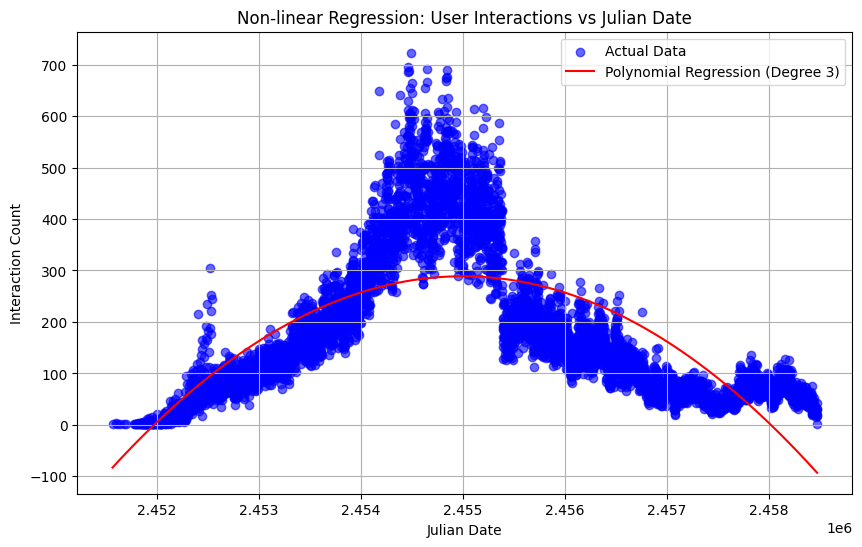

In [16]:
# Aggregate data to count interactions per day
interaction_counts = merged_data.groupby('Julian_Date').size().reset_index(name='interaction_count')

# Features and target
X = interaction_counts[['Julian_Date']]  # Julian Date
y = interaction_counts['interaction_count']  # Interaction Count

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression (Degree 3 for non-linear relationship)
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"Polynomial Degree: {degree}")
print(f"Train Mean Squared Error (MSE): {mse_train}")
print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Train R-squared Score (R²): {r2_train}")
print(f"Test R-squared Score (R²): {r2_test}")

# Fixing the input format issue for predictions
X_curve = pd.DataFrame(
    np.linspace(X['Julian_Date'].min(), X['Julian_Date'].max(), 500),
    columns=['Julian_Date']
)

# Generate predictions for the regression curve
y_curve = model.predict(X_curve)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_curve, y_curve, color='red', label=f'Polynomial Regression (Degree {degree})')

plt.title("Non-linear Regression: User Interactions vs Julian Date")
plt.xlabel("Julian Date")
plt.ylabel("Interaction Count")
plt.legend()
plt.grid()
plt.show()

* The main objective of this term project is to study and model user engagement behavior by examining how users interact with recipes over time. Recipe data and user interaction data are the two primary parts of the dataset. The latter is linked to a Julian Date, which is a continuous representation of time, and records user activities including ratings, views, and other interactions with recipes. A polynomial regression model is used to capture the non-linear relationships present in the data and reveal trends in how interactions evolve over time.

* **A Challenge for Linear Models**

* This dataset does not lend itself to a straightforward linear regression model since user interactions do not exhibit a linear pattern. It is clear from the data visualization that the interaction counts rise quickly over time, peak, and then fall. This gives the data a U-shaped curve, which is typical of non-linear connections. Consequently, a polynomial regression model is more suitable than a linear model since it can better capture the intricacy of such data.

* **Polynomial Regression: Why Use It?**

* This approach can represent more intricate patterns, like the peaks and troughs shown in the interaction data, by utilizing higher-degree polynomials. A third-degree polynomial was used for this project in order to represent the non-linear character of the interaction data.

* The interaction counts are intended to be fitted over time by the polynomial regression curve. The model can better fit the underlying trend of the data by varying the polynomial's degree. Because polynomial regression may identify data turning points, it can be used to mimic user interaction characteristics including growth, stagnation, and decline.

* **conclusion**

* A practical method for simulating non-linear connections in time-series data is polynomial regression. By documenting intricate interaction trends throughout Julian dates, this term project offers insightful information on user involvement patterns. Despite its flaws, the model shows how polynomial regression can be used to comprehend and forecast user behavior. In order to increase prediction accuracy.

### Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the outcome is categorical. It predicts the probability of a dependent variable belonging to a particular category based on one or more independent variables.

For this project, We will be classifying recipes into 2 categories healthy or unhealthy based on its nutrition information

#### Data Preprocessing

##### 1. In the our dataset, the nutrition column typically stores a list of nutritional values like numerical array in one column. Values are 'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'. So first these columns needs to be separated.

In [17]:
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
merged_data[nutrition_columns] = merged_data['nutrition'].str.strip('[]').str.split(',', expand=True)
merged_data[nutrition_columns] = merged_data[nutrition_columns].apply(pd.to_numeric, errors='coerce')
merged_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,rating,review,Julian_Date,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5,I used an acorn squash and recipe#137681 Swee...,2453784.5,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5,This was a nice change. I used butternut squas...,2455429.5,51.5,0.0,13.0,0.0,2.0,0.0,4.0


##### 2. Give label as "healthy" vs "unhealthy"

Define "healthy" recipes as those with **fewer calories, lower fat, and less sugar**.

In [18]:
# Define a rule-based label: Healthy (1) or Unhealthy (0)
merged_data['healthy'] = ((merged_data['calories'] < 400) & 
               (merged_data['total_fat'] < 18) & 
               (merged_data['sugar'] < 18)).astype(int)

# Check the distribution of labels
print(merged_data['healthy'].value_counts())

healthy
0    913821
1    218546
Name: count, dtype: int64


##### 3. Prepare data and train logistic regression model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = merged_data[['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']]
y = merged_data['healthy']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
model = LogisticRegression(max_iter=1000)
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

##### Predictions

In [20]:
# Predict labels for the test set
y_pred = model.predict(X_test)

# Get probabilities for each class
y_proba = model.predict_proba(X_test)

##### Check accuracy

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    182806
           1       0.88      0.88      0.88     43668

    accuracy                           0.95    226474
   macro avg       0.92      0.92      0.92    226474
weighted avg       0.95      0.95      0.95    226474



#### Summary

##### Accuracy: 0.95
The model correctly classifies 95% of the samples.

##### Precision & Recall
Class 0 - **unhealthy** (Majority Class): 0.97 : Out of all instances predicted as class 0, 97% are correct.<br>
Class 1 - **healthy**   (Minority Class): 0.88 : Out of all instances predicted as class 1, 88% are correct.

##### F1-Score
Class 0: 0.97 - The harmonic mean of precision and recall for class 0 is very high.<br>
Class 1: 0.88 - The F1-score for class 1 is slightly lower, reflecting slightly less balance between precision and recall.

These results show your model is robust.
